<a href="https://colab.research.google.com/github/YouCanKeepSilence/ml_lab1/blob/master/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First lab of ML course at HSE
Задача отчасти вырожденная и состоит в классификации пола людей, на основании возраста и данных ЭКГ с одного датчика из 12 (5000 измерений)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Загружаем данные


In [0]:
names_array = ['gender', 'age', *['calc_{}'.format(i + 1) for i in range(5000)]]
url = 'https://gitlab.com/KeepSilence/ml_lab1/raw/master/mapped_0.csv'
data = pd.read_csv(url, names=names_array)

In [3]:
data

,gender,age,calc_1,calc_2,calc_3,calc_4,calc_5,calc_6,calc_7,calc_8,calc_9,calc_10,calc_11,calc_12,calc_13,calc_14,calc_15,calc_16,calc_17,calc_18,calc_19,calc_20,calc_21,calc_22,calc_23,calc_24,calc_25,calc_26,calc_27,calc_28,calc_29,calc_30,calc_31,calc_32,calc_33,calc_34,calc_35,calc_36,calc_37,calc_38,...,calc_4961,calc_4962,calc_4963,calc_4964,calc_4965,calc_4966,calc_4967,calc_4968,calc_4969,calc_4970,calc_4971,calc_4972,calc_4973,calc_4974,calc_4975,calc_4976,calc_4977,calc_4978,calc_4979,calc_4980,calc_4981,calc_4982,calc_4983,calc_4984,calc_4985,calc_4986,calc_4987,calc_4988,calc_4989,calc_4990,calc_4991,calc_4992,calc_4993,calc_4994,calc_4995,calc_4996,calc_4997,calc_4998,calc_4999,calc_5000
0,Female,34.0,0.017377,0.017173,0.006273,-0.005822,-0.000898,0.006432,-0.009956,-0.024221,-0.008045,-0.000752,-0.022397,-0.028680,-0.013310,-0.035345,-0.065335,-0.050751,-0.050277,-0.075426,-0.060486,-0.037085,-0.045233,-0.056783,-0.061567,-0.061172,-0.053972,-0.056869,-0.036423,-0.034488,-0.077638,-0.094942,-0.110115,-0.107786,-0.104741,-0.085659,-0.062397,-0.042837,-0.035354,-0.013876,...,-0.016028,-0.025340,-0.027306,-0.020218,-0.035244,-0.053864,-0.055907,-0.068527,-0.075154,-0.077934,-0.078753,-0.068867,-0.075073,-0.076825,-0.045477,-0.057386,-0.096442,-0.096529,-0.106660,-0.092442,-0.087466,-0.098859,-0.078740,-0.071801,-0.106028,-0.104063,-0.102233,-0.090487,-0.086935,-0.099998,-0.102428,-0.090055,-0.075428,-0.096027,-0.102075,-0.081304,-0.078941,-0.069018,-0.093367,-0.105099
1,Female,62.0,-0.037018,-0.055241,-0.048316,-0.047673,-0.048782,-0.048156,-0.041373,-0.040428,-0.041812,-0.037673,-0.036891,-0.037920,-0.039302,-0.034801,-0.029571,-0.031918,-0.029428,-0.029256,-0.031880,-0.022082,-0.019279,-0.019425,-0.012374,-0.009054,-0.009628,-0.008687,0.000523,0.001495,0.001185,0.010422,0.013835,0.010831,0.015203,0.025826,0.028994,0.033175,0.038748,0.041375,...,-0.034611,-0.034660,-0.034541,-0.036750,-0.041977,-0.034990,-0.039547,-0.044974,-0.039799,-0.039707,-0.039783,-0.038966,-0.037508,-0.041650,-0.042513,-0.041629,-0.045130,-0.044903,-0.041910,-0.042041,-0.044737,-0.047037,-0.044378,-0.044934,-0.044370,-0.039870,-0.042288,-0.044708,-0.038015,-0.021986,0.003110,0.035944,0.068554,0.101739,0.141519,0.195136,0.272526,0.356708,0.441763,0.500115
2,Female,76.0,-0.122721,-0.124721,-0.127721,-0.129721,-0.130721,-0.129721,-0.126721,-0.120721,-0.114721,-0.107721,-0.100721,-0.095721,-0.092721,-0.090721,-0.091721,-0.097721,-0.102721,-0.109721,-0.116721,-0.123721,-0.127721,-0.130721,-0.132721,-0.134721,-0.133721,-0.131721,-0.132721,-0.130721,-0.129721,-0.128721,-0.127721,-0.125721,-0.123721,-0.123721,-0.124721,-0.124721,-0.125721,-0.127721,...,-0.042721,-0.044721,-0.045721,-0.047721,-0.047721,-0.049721,-0.053721,-0.052721,-0.054721,-0.056721,-0.058721,-0.060721,-0.064721,-0.068721,-0.073721,-0.076721,-0.077721,-0.080721,-0.081721,-0.083721,-0.083721,-0.081721,-0.076721,-0.073721,-0.069721,-0.065721,-0.061721,-0.055721,-0.050721,-0.047721,-0.045721,-0.044721,-0.044721,-0.044721,-0.046721,-0.049721,-0.052721,-0.054721,-0.055721,-0.058721
3,Female,46.0,0.000518,0.000737,0.000667,0.000706,0.000682,0.000697,0.000687,0.000693,0.000690,0.000692,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,...,0.046271,0.076319,0.075903,0.068957,0.074045,0.063469,0.069179,0.079320,0.073515,0.053000,0.041038,0.055822,0.064132,0.043465,0.039074,0.061152,0.059176,0.048599,0.046650,0.063560,0.071639,0.059098,0.054123,0.045643,0.041100,0.044859,0.038923,0.043094,0.039124,0.058432,0.053542,0.017999,0.016324,0.032443,0.049111,0.051212,0.044374,0.066611,0.066081,0.023927
4,Female,28.0,-0.041747,-0.061089,-0.055401,-0.058469,-0.056309,-0.052806,-0.054935,-0.062014,-0.059155,-0.062260,-0.060335,-0.060111,-0.056735,-0.042355,-0.027140,-0.019575,-0.012119,-0.002305,0.01516

In [4]:
print(data)

      gender   age    calc_1  ...  calc_4998  calc_4999  calc_5000
0     Female  34.0  0.017377  ...  -0.069018  -0.093367  -0.105099
1     Female  62.0 -0.037018  ...   0.356708   0.441763   0.500115
2     Female  76.0 -0.122721  ...  -0.054721  -0.055721  -0.058721
3     Female  46.0  0.000518  ...   0.066611   0.066081   0.023927
4     Female  28.0 -0.041747  ...  -0.022264  -0.024342  -0.019548
5     Female  55.0  0.072939  ...   0.119655   0.123231   0.144515
6       Male  59.0 -0.027844  ...  -0.024956  -0.023782  -0.024437
7       Male  64.0 -0.005400  ...  -0.028176  -0.029889  -0.026282
8     Female  74.0 -0.012191  ...  -0.022132  -0.013819  -0.017630
9     Female  27.0 -0.025261  ...  -0.071971  -0.069418  -0.062614
10    Female  87.0 -0.046157  ...   0.046621   0.026307   0.020101
11      Male  77.0 -0.019267  ...  -0.026115  -0.025134  -0.027490
12    Female  64.0  0.032828  ...  -0.025172  -0.025172  -0.027172
13    Female  73.0  0.002443  ...  -0.012557  -0.011557  -0.01

# Немного подергаем встроенные функции, чтоб понять структуру данных

In [5]:
data.head() # Не ясно имеет ли смысл, но пусть убдет тут

,gender,age,calc_1,calc_2,calc_3,calc_4,calc_5,calc_6,calc_7,calc_8,calc_9,calc_10,calc_11,calc_12,calc_13,calc_14,calc_15,calc_16,calc_17,calc_18,calc_19,calc_20,calc_21,calc_22,calc_23,calc_24,calc_25,calc_26,calc_27,calc_28,calc_29,calc_30,calc_31,calc_32,calc_33,calc_34,calc_35,calc_36,calc_37,calc_38,...,calc_4961,calc_4962,calc_4963,calc_4964,calc_4965,calc_4966,calc_4967,calc_4968,calc_4969,calc_4970,calc_4971,calc_4972,calc_4973,calc_4974,calc_4975,calc_4976,calc_4977,calc_4978,calc_4979,calc_4980,calc_4981,calc_4982,calc_4983,calc_4984,calc_4985,calc_4986,calc_4987,calc_4988,calc_4989,calc_4990,calc_4991,calc_4992,calc_4993,calc_4994,calc_4995,calc_4996,calc_4997,calc_4998,calc_4999,calc_5000
0,Female,34.0,0.017377,0.017173,0.006273,-0.005822,-0.000898,0.006432,-0.009956,-0.024221,-0.008045,-0.000752,-0.022397,-0.028680,-0.013310,-0.035345,-0.065335,-0.050751,-0.050277,-0.075426,-0.060486,-0.037085,-0.045233,-0.056783,-0.061567,-0.061172,-0.053972,-0.056869,-0.036423,-0.034488,-0.077638,-0.094942,-0.110115,-0.107786,-0.104741,-0.085659,-0.062397,-0.042837,-0.035354,-0.013876,...,-0.016028,-0.025340,-0.027306,-0.020218,-0.035244,-0.053864,-0.055907,-0.068527,-0.075154,-0.077934,-0.078753,-0.068867,-0.075073,-0.076825,-0.045477,-0.057386,-0.096442,-0.096529,-0.106660,-0.092442,-0.087466,-0.098859,-0.078740,-0.071801,-0.106028,-0.104063,-0.102233,-0.090487,-0.086935,-0.099998,-0.102428,-0.090055,-0.075428,-0.096027,-0.102075,-0.081304,-0.078941,-0.069018,-0.093367,-0.105099
1,Female,62.0,-0.037018,-0.055241,-0.048316,-0.047673,-0.048782,-0.048156,-0.041373,-0.040428,-0.041812,-0.037673,-0.036891,-0.037920,-0.039302,-0.034801,-0.029571,-0.031918,-0.029428,-0.029256,-0.031880,-0.022082,-0.019279,-0.019425,-0.012374,-0.009054,-0.009628,-0.008687,0.000523,0.001495,0.001185,0.010422,0.013835,0.010831,0.015203,0.025826,0.028994,0.033175,0.038748,0.041375,...,-0.034611,-0.034660,-0.034541,-0.036750,-0.041977,-0.034990,-0.039547,-0.044974,-0.039799,-0.039707,-0.039783,-0.038966,-0.037508,-0.041650,-0.042513,-0.041629,-0.045130,-0.044903,-0.041910,-0.042041,-0.044737,-0.047037,-0.044378,-0.044934,-0.044370,-0.039870,-0.042288,-0.044708,-0.038015,-0.021986,0.003110,0.035944,0.068554,0.101739,0.141519,0.195136,0.272526,0.356708,0.441763,0.500115
2,Female,76.0,-0.122721,-0.124721,-0.127721,-0.129721,-0.130721,-0.129721,-0.126721,-0.120721,-0.114721,-0.107721,-0.100721,-0.095721,-0.092721,-0.090721,-0.091721,-0.097721,-0.102721,-0.109721,-0.116721,-0.123721,-0.127721,-0.130721,-0.132721,-0.134721,-0.133721,-0.131721,-0.132721,-0.130721,-0.129721,-0.128721,-0.127721,-0.125721,-0.123721,-0.123721,-0.124721,-0.124721,-0.125721,-0.127721,...,-0.042721,-0.044721,-0.045721,-0.047721,-0.047721,-0.049721,-0.053721,-0.052721,-0.054721,-0.056721,-0.058721,-0.060721,-0.064721,-0.068721,-0.073721,-0.076721,-0.077721,-0.080721,-0.081721,-0.083721,-0.083721,-0.081721,-0.076721,-0.073721,-0.069721,-0.065721,-0.061721,-0.055721,-0.050721,-0.047721,-0.045721,-0.044721,-0.044721,-0.044721,-0.046721,-0.049721,-0.052721,-0.054721,-0.055721,-0.058721
3,Female,46.0,0.000518,0.000737,0.000667,0.000706,0.000682,0.000697,0.000687,0.000693,0.000690,0.000692,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,0.000691,...,0.046271,0.076319,0.075903,0.068957,0.074045,0.063469,0.069179,0.079320,0.073515,0.053000,0.041038,0.055822,0.064132,0.043465,0.039074,0.061152,0.059176,0.048599,0.046650,0.063560,0.071639,0.059098,0.054123,0.045643,0.041100,0.044859,0.038923,0.043094,0.039124,0.058432,0.053542,0.017999,0.016324,0.032443,0.049111,0.051212,0.044374,0.066611,0.066081,0.023927
4,Female,28.0,-0.041747,-0.061089,-0.055401,-0.058469,-0.056309,-0.052806,-0.054935,-0.062014,-0.059155,-0.062260,-0.060335,-0.060111,-0.056735,-0.042355,-0.027140,-0.019575,-0.012119,-0.002305,0.01516

In [6]:
data.tail() # Аналогично предыдущему

,gender,age,calc_1,calc_2,calc_3,calc_4,calc_5,calc_6,calc_7,calc_8,calc_9,calc_10,calc_11,calc_12,calc_13,calc_14,calc_15,calc_16,calc_17,calc_18,calc_19,calc_20,calc_21,calc_22,calc_23,calc_24,calc_25,calc_26,calc_27,calc_28,calc_29,calc_30,calc_31,calc_32,calc_33,calc_34,calc_35,calc_36,calc_37,calc_38,...,calc_4961,calc_4962,calc_4963,calc_4964,calc_4965,calc_4966,calc_4967,calc_4968,calc_4969,calc_4970,calc_4971,calc_4972,calc_4973,calc_4974,calc_4975,calc_4976,calc_4977,calc_4978,calc_4979,calc_4980,calc_4981,calc_4982,calc_4983,calc_4984,calc_4985,calc_4986,calc_4987,calc_4988,calc_4989,calc_4990,calc_4991,calc_4992,calc_4993,calc_4994,calc_4995,calc_4996,calc_4997,calc_4998,calc_4999,calc_5000
1995,Female,32.0,-0.009854,-0.015207,-0.010390,-0.016793,-0.018239,-0.009048,-0.027739,-0.033541,-0.018621,-0.019479,-0.029026,-0.026725,-0.026179,-0.025949,-0.023226,-0.034032,-0.042041,-0.033733,-0.023614,-0.018005,-0.028501,-0.034240,-0.026819,-0.026955,-0.028613,-0.031533,-0.039376,-0.042624,-0.042609,-0.052610,-0.027754,-0.021340,-0.021184,-0.016684,-0.012267,-0.015957,-0.019278,-0.017521,...,0.064076,0.059488,0.062435,0.061338,0.057032,0.052212,0.051772,0.052111,0.049215,0.039362,0.038449,0.045251,0.043514,0.031901,0.026962,0.027161,0.031056,0.032217,0.028951,0.026820,0.023414,0.011983,0.013258,0.016479,0.021741,0.024372,0.016702,0.015453,0.011439,0.009426,0.011289,0.008373,0.003986,0.001184,0.001458,0.002077,0.003726,0.000608,-0.001153,-0.000925
1996,Female,22.0,-0.058825,-0.059825,-0.059825,-0.058825,-0.056825,-0.055825,-0.053825,-0.053825,-0.052825,-0.050825,-0.048825,-0.047825,-0.045825,-0.042825,-0.041825,-0.039825,-0.035825,-0.034825,-0.030825,-0.027825,-0.023825,-0.020825,-0.016825,-0.010825,-0.006825,-0.000825,0.004175,0.012175,0.018175,0.024175,0.031175,0.037175,0.043175,0.050175,0.056175,0.062175,0.066175,0.071175,...,0.141175,0.140175,0.138175,0.137175,0.135175,0.134175,0.132175,0.129175,0.125175,0.120175,0.115175,0.110175,0.104175,0.099175,0.094175,0.087175,0.083175,0.078175,0.073175,0.067175,0.061175,0.055175,0.048175,0.041175,0.036175,0.029175,0.024175,0.019175,0.015175,0.011175,0.007175,0.003175,0.000175,-0.001825,-0.004825,-0.007825,-0.010825,-0.013825,-0.015825,-0.017825
1997,Female,67.0,0.010923,0.017923,0.022923,0.027923,0.029923,0.027923,0.027923,0.032923,0.037923,0.042923,0.047923,0.049923,0.050923,0.052923,0.055923,0.060923,0.062923,0.063923,0.063923,0.064923,0.064923,0.063923,0.058923,0.048923,0.034923,0.019923,0.007923,-0.003077,-0.006077,-0.006077,-0.001077,0.002923,0.006923,0.010923,0.010923,0.008923,0.007923,0.005923,...,-0.176077,-0.149077,-0.130077,-0.117077,-0.111077,-0.105077,-0.102077,-0.102077,-0.100077,-0.101077,-0.099077,-0.096077,-0.094077,-0.094077,-0.093077,-0.095077,-0.100077,-0.102077,-0.102077,-0.100077,-0.096077,-0.092077,-0.090077,-0.088077,-0.091077,-0.089077,-0.087077,-0.082077,-0.073077,-0.066077,-0.064077,-0.066077,-0.072077,-0.079077,-0.086077,-0.087077,-0.085077,-0.082077,-0.078077,-0.076077
1998,Female,77.0,-0.139597,-0.175628,-0.127727,-0.121525,-0.094681,-0.075898,-0.065915,-0.057495,-0.035772,-0.026661,-0.025508,-0.016698,-0.011397,-0.011168,-0.001619,0.013370,0.011484,0.009327,0.019104,0.019167,0.009243,0.011523,0.013826,0.010820,0.014458,0.021929,0.024451,0.031495,0.046983,0.051774,0.046998,0.046902,0.044277,0.033855,0.034705,0.046787,0.051095,0.054434,...,0.054360,0.056818,0.059453,0.052010,0.041837,0.038709,0.032408,0.026751,0.026394,0.021011,0.013630,0.011363,0.009309,-0.005616,-0.018920,-0.023736,-0.036541,-0.047026,-0.043645,-0.041889,-0.043934,-0.038637,-0.036533,-0.043315,-0.048948,-0.048600,-0.053581,-0.063888,-0.061218,-0.054436,-0.059207,-0.054410,-0.046481,-0.054017,-0.056166,-0.052234,-0.052940,-0.060382,-0.052929,-0.054481
1999,Female,57.0,-0.048697,-0.064173,-0.055394,-0.058660,-0.059430,-0.062902,-0.059572,-0.060321,-0.061996,-0.060720,-0.055074,-0.055836,-0.057664,-0.057957,-0.062746,-0.065346,-0.057520,-0.051743,-0.053721,-0.054314,-0.053017,-0.057010,-

In [7]:
print(data.shape) # размерность измерений
print(data.columns) # названия столбцов

(2000, 5002)
Index(['gender', 'age', 'calc_1', 'calc_2', 'calc_3', 'calc_4', 'calc_5',
       'calc_6', 'calc_7', 'calc_8',
       ...
       'calc_4991', 'calc_4992', 'calc_4993', 'calc_4994', 'calc_4995',
       'calc_4996', 'calc_4997', 'calc_4998', 'calc_4999', 'calc_5000'],
      dtype='object', length=5002)


In [8]:
print(data.at[2, 'age']) # get 'age' column from 3th record

76.0


In [9]:
data['gender'].dtype.name # -> object (classified)
data['age'].dtype.name # -> float64

'float64'

In [10]:
data.describe() # some aggregation at numeric properties

,age,calc_1,calc_2,calc_3,calc_4,calc_5,calc_6,calc_7,calc_8,calc_9,calc_10,calc_11,calc_12,calc_13,calc_14,calc_15,calc_16,calc_17,calc_18,calc_19,calc_20,calc_21,calc_22,calc_23,calc_24,calc_25,calc_26,calc_27,calc_28,calc_29,calc_30,calc_31,calc_32,calc_33,calc_34,calc_35,calc_36,calc_37,calc_38,calc_39,...,calc_4961,calc_4962,calc_4963,calc_4964,calc_4965,calc_4966,calc_4967,calc_4968,calc_4969,calc_4970,calc_4971,calc_4972,calc_4973,calc_4974,calc_4975,calc_4976,calc_4977,calc_4978,calc_4979,calc_4980,calc_4981,calc_4982,calc_4983,calc_4984,calc_4985,calc_4986,calc_4987,calc_4988,calc_4989,calc_4990,calc_4991,calc_4992,calc_4993,calc_4994,calc_4995,calc_4996,calc_4997,calc_4998,calc_4999,calc_5000
count,1997.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1996.000000
mean,60.782173,-0.004769,-0.005914,-0.005210,-0.004844,-0.003942,-0.003127,-0.002254,-0.001665,-0.001089,-0.000321,0.000783,0.017678,0.001311,0.017792,0.001228,0.001081,0.000908,0.000577,0.000479,0.000371,0.000130,0.000239,-0.000009,-0.000400,-0.000266,-0.000071,-0.000099,0.000137,0.000307,0.000094,0.000343,0.000423,0.000564,0.000246,-0.000059,-0.000034,0.000272,0.000633,0.000924,...,-0.001611,-0.000839,-0.000447,-0.000145,0.000165,0.000724,0.000984,0.000803,0.000845,0.001168,0.001695,0.001836,0.002012,0.001775,0.001409,0.001425,0.000992,0.000432,0.000685,0.000696,0.000462,0.000004,-0.000755,-0.001341,-0.001642,-0.001331,-0.000852,0.015442,-0.001023,-0.000801,-0.000572,-0.000744,-0.000711,-0.000565,-0.000456,0.000179,0.001028,0.001516,0.002335,0.002976
std,19.121543,0.125923,0.142944,0.137676,0.141510,0.140578,0.142411,0.142961,0.145329,0.146996,0.149032,0.150510,0.748074,0.151866,0.748051,0.150847,0.150300,0.149714,0.148126,0.146080,0.144257,0.142590,0.141144,0.140307,0.140441,0.141739,0.143320,0.144624,0.145534,0.145959,0.145178,0.143509,0.141594,0.140536,0.140251,0.140590,0.141208,0.142310,0.143414,0.144071,...,0.123029,0.125092,0.127093,0.128594,0.129521,0.130493,0.130927,0.131007,0.131110,0.130950,0.130937,0.130999,0.131522,0.132744,0.134612,0.135527,0.135417,0.135621,0.136157,0.135917,0.135031,0.133780,0.131189,0.128308,0.125915,0.124484,0.123631,0.741719,0.123760,0.123837,0.123485,0.123429,0.123112,0.123606,0.123229,0.124334,0.124882,0.126270,0.126159,0.129664
min,2.000000,-2.272729,-2.252729,-2.242729,-2.239729,-2.240729,-2.235729,-2.223729,-2.201729,-2.172729,-2.141729,-2.110729,-2.082729,-2.060729,-2.041729,-2.030729,-2.022729,-2.017729,-2.014729,-2.007729,-1.995729,-1.975729,-1.953729,-1.935729,-1.926729,-1.922729,-1.914729,-1.897729,-1.871729,-1.840729,-1.811729,-1.787729,-1.767729,-1.753729,-1.737729,-1.721729,-1.707729,-1.689729,-1.670729,-1.648729,...,-0.795409,-0.817409,-0.840409,-0.849409,-0.843409,-0.822409,-0.799409,-0.787409,-0.785409,-0.789409,-0.798409,-0.803409,-0.802409,-0.791409,-0.777409,-0.761409,-0.753409,-0.753409,-0.768409,-0.790409,-0.820409,-0.840409,-0.851409,-0.839409,-0.809409,-0.768409,-0.721409,-0.695306,-0.724306,-0.742306,-0.746306,-0.730306,-0.699306,-0.655306,-0.601306,-0.569409,-0.594409,-0.624409,-0.654409,-0.674409
25%,49.000000,-0.03

# Визуализируем данные

Рассмотрим корреляцию первых 10 измерений

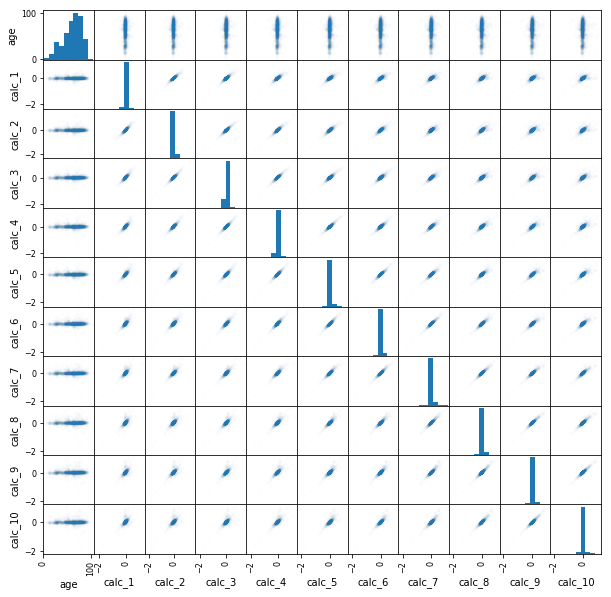

In [11]:
from pandas.plotting import scatter_matrix
scatter_matrix(data.drop(columns=['calc_{}'.format(i + 1) for i in range(10, 5000)]), alpha = .01, figsize = (10, 10)) # не удалось дождаться
pass

Проверим корреляцию для последних 10 измерений

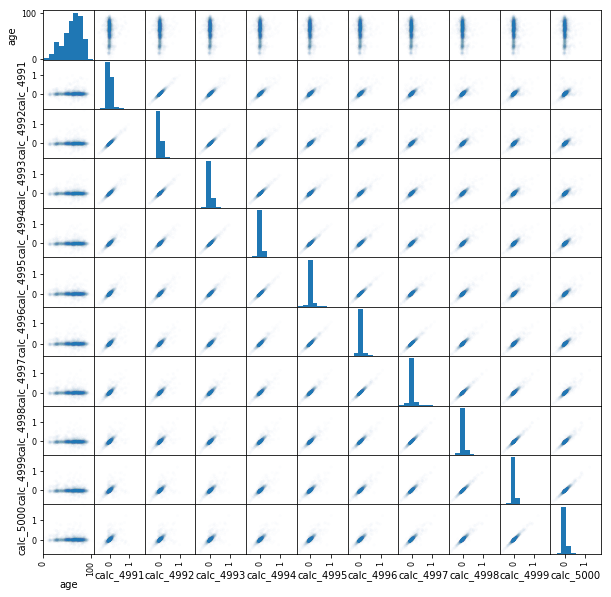

In [12]:
scatter_matrix(data.drop(columns=['calc_{}'.format(i + 1) for i in range(0, 4990)]), alpha = .01, figsize = (10, 10)) # не удалось дождаться
pass

И корреляцию первых 10 измерениий

In [13]:
data.drop(columns=['calc_{}'.format(i + 1) for i in range(100, 5000)]).corr()

,age,calc_1,calc_2,calc_3,calc_4,calc_5,calc_6,calc_7,calc_8,calc_9,calc_10,calc_11,calc_12,calc_13,calc_14,calc_15,calc_16,calc_17,calc_18,calc_19,calc_20,calc_21,calc_22,calc_23,calc_24,calc_25,calc_26,calc_27,calc_28,calc_29,calc_30,calc_31,calc_32,calc_33,calc_34,calc_35,calc_36,calc_37,calc_38,calc_39,...,calc_61,calc_62,calc_63,calc_64,calc_65,calc_66,calc_67,calc_68,calc_69,calc_70,calc_71,calc_72,calc_73,calc_74,calc_75,calc_76,calc_77,calc_78,calc_79,calc_80,calc_81,calc_82,calc_83,calc_84,calc_85,calc_86,calc_87,calc_88,calc_89,calc_90,calc_91,calc_92,calc_93,calc_94,calc_95,calc_96,calc_97,calc_98,calc_99,calc_100
age,1.000000,-0.001795,-0.003563,-0.007176,-0.005501,-0.004450,-0.003975,-0.002767,0.000283,-0.000490,-0.005521,-0.010522,-0.005107,-0.020467,0.023788,-0.029500,-0.033990,-0.035811,-0.038524,-0.041781,-0.044367,-0.046873,-0.047216,-0.046443,-0.047233,-0.044574,-0.041137,-0.039802,-0.039509,-0.035717,-0.030545,-0.023752,-0.017161,-0.014483,-0.013055,-0.010368,-0.005936,-0.003717,-0.005306,-0.008387,...,0.016280,0.014828,0.011675,0.008363,0.006671,0.006717,0.007271,0.005230,0.004773,0.003154,0.001263,0.000013,0.001283,-0.001083,-0.004319,-0.003586,-0.003605,-0.005503,-0.010134,-0.016899,-0.023991,-0.029208,-0.033735,-0.035165,-0.030938,-0.027341,-0.027907,-0.029531,-0.029502,0.006044,-0.030353,-0.023502,-0.018824,-0.016881,-0.014684,-0.012908,-0.009749,-0.003318,0.004616,0.009880
calc_1,-0.001795,1.000000,0.978650,0.962379,0.933718,0.899720,0.859301,0.810674,0.757802,0.704373,0.655144,0.611729,0.120304,0.541697,0.093978,0.492673,0.474627,0.460701,0.452263,0.449132,0.447887,0.447022,0.445420,0.440786,0.433449,0.422299,0.409772,0.398100,0.388749,0.381714,0.379687,0.380883,0.382840,0.383805,0.380584,0.373795,0.365835,0.357022,0.352514,0.348375,...,0.292646,0.285294,0.278853,0.276099,0.274572,0.273406,0.271952,0.269833,0.266804,0.264165,0.261114,0.258023,0.256429,0.254814,0.252309,0.247176,0.241911,0.235293,0.229790,0.224291,0.217345,0.212304,0.206851,0.200514,0.194957,0.190485,0.186738,0.183753,0.182787,0.026081,0.182678,0.183115,0.183303,0.182342,0.182855,0.186140,0.190398,0.193641,0.193643,0.193016
calc_2,-0.003563,0.978650,1.000000,0.988285,0.969311,0.937936,0.902473,0.854181,0.801172,0.745600,0.693615,0.647153,0.125549,0.570540,0.101444,0.513069,0.491440,0.474666,0.463192,0.457675,0.454241,0.451895,0.449458,0.443712,0.436068,0.423993,0.409689,0.397701,0.388144,0.380739,0.378522,0.378782,0.380147,0.381035,0.378199,0.372257,0.364567,0.355258,0.350622,0.346170,...,0.288672,0.282223,0.275853,0.273423,0.272906,0.271687,0.269491,0.266903,0.263233,0.259908,0.256994,0.254166,0.252263,0.250273,0.247934,0.242785,0.236623,0.229801,0.224723,0.219339,0.212196,0.206742,0.200764,0.194555,0.189374,0.185227,0.181685,0.178939,0.177891,0.025962,0.176488,0.176660,0.176973,0.175182,0.175821,0.179267,0.183522,0.187480,0.187827,0.186595
calc_3,-0.007176,0.962379,0.988285,1.000000,0.991271,0.969456,0.940971,0.899472,0.851313,0.799633,0.748376,0.700398,0.134531,0.618994,0.111953,0.551475,0.524798,0.503873,0.488945,0.480937,0.474650,0.469186,0.464638,0.457439,0.449601,0.436349,0.419682,0.407271,0.397345,0.389492,0.387606,0.387931,0.388999,0.389055,0.385893,0.380103,0.372259,0.362526,0.357200,0.352250,...,0.289946,0.284142,0.277364,0.273921,0.273371,0.272427,0.269888,0.267787,0.263991,0.259345,0.255835,0.253208,0.252144,0.250591,0.247865,0.242949,0.235781,0.228665,0.224397,0.219865,0.213133,0.207616,0.201158,0.194764,0.189083,0.184710,0.181183,0.178369,0.177372,0.025503,0.176694,0.176934,0.176870,0.174332,0.175121,0.177937,0.181679,0.186251,0.187198,0.185698
calc_4,-0.005501,0.933718,0.969311,0.991271,1.000000,0.990443,0.968828,0.933807,0.891291,0.843531,0.795014,0.747833,0.142484,0.661593,0.122173,0.587872,0.556817,0.531193,0.512416,0.500811,0.492082,0.484044,0.476711,0.467444,0.458042,0.443832,0.426549,0.413672,0.402963,0.394513,0.392707,0.393250,0.393921,0.393193,0.389403,0.382684,0.374335,0.364311,0.359444,0.354252,...,0.291075,0

По итогам визуализации видно, что соседние несколько значений сильно коррелируют друг с другом, при удалении измерений по времени друг от друга корреляция уменьшается.

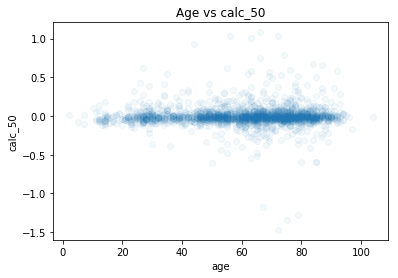

In [14]:
plt.plot(data['age'], data['calc_50'], 'o', alpha = 0.05)
plt.xlabel('age')
plt.ylabel('calc_50')
plt.title('Age vs calc_50')
pass

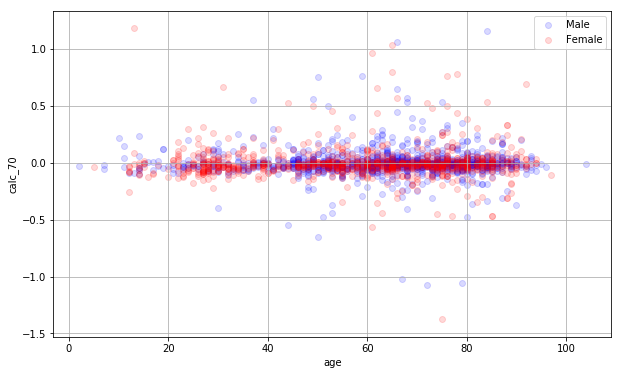

In [15]:
plt.figure(figsize = (10, 6))
calc_name = 'calc_70'

plt.scatter(data[data['gender'] == 'Male']['age'],
            data[data['gender'] == 'Male'][calc_name],
            alpha = 0.15,
            label = 'Male',
            color = 'b')

plt.scatter(data[data['gender'] == 'Female']['age'],
            data[data['gender'] == 'Female'][calc_name],
            alpha = 0.15,
            label = 'Female',
            color = 'r')

plt.xlabel('age')
plt.ylabel(calc_name)
plt.legend()
plt.grid()

На основе визуализации непонятно как вычислить выбросы и есть ли они вообще.

# Обработаем пропущенные значения

In [16]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['gender']
['age', 'calc_1', 'calc_2', 'calc_3', 'calc_4', 'calc_5', 'calc_6', 'calc_7', 'calc_8', 'calc_9', 'calc_10', 'calc_11', 'calc_12', 'calc_13', 'calc_14', 'calc_15', 'calc_16', 'calc_17', 'calc_18', 'calc_19', 'calc_20', 'calc_21', 'calc_22', 'calc_23', 'calc_24', 'calc_25', 'calc_26', 'calc_27', 'calc_28', 'calc_29', 'calc_30', 'calc_31', 'calc_32', 'calc_33', 'calc_34', 'calc_35', 'calc_36', 'calc_37', 'calc_38', 'calc_39', 'calc_40', 'calc_41', 'calc_42', 'calc_43', 'calc_44', 'calc_45', 'calc_46', 'calc_47', 'calc_48', 'calc_49', 'calc_50', 'calc_51', 'calc_52', 'calc_53', 'calc_54', 'calc_55', 'calc_56', 'calc_57', 'calc_58', 'calc_59', 'calc_60', 'calc_61', 'calc_62', 'calc_63', 'calc_64', 'calc_65', 'calc_66', 'calc_67', 'calc_68', 'calc_69', 'calc_70', 'calc_71', 'calc_72', 'calc_73', 'calc_74', 'calc_75', 'calc_76', 'calc_77', 'calc_78', 'calc_79', 'calc_80', 'calc_81', 'calc_82', 'calc_83', 'calc_84', 'calc_85', 'calc_86', 'calc_87', 'calc_88', 'calc_89', 'calc_90', 

In [17]:
data[numerical_columns].count(axis = 0)

age          1997
calc_1       2000
calc_2       2000
calc_3       2000
calc_4       2000
calc_5       2000
calc_6       2000
calc_7       2000
calc_8       2000
calc_9       2000
calc_10      2000
calc_11      2000
calc_12      2000
calc_13      2000
calc_14      2000
calc_15      2000
calc_16      2000
calc_17      2000
calc_18      2000
calc_19      2000
calc_20      2000
calc_21      2000
calc_22      2000
calc_23      2000
calc_24      2000
calc_25      2000
calc_26      2000
calc_27      2000
calc_28      2000
calc_29      2000
             ... 
calc_4971    1998
calc_4972    1998
calc_4973    1998
calc_4974    1998
calc_4975    1998
calc_4976    1998
calc_4977    1998
calc_4978    1998
calc_4979    1998
calc_4980    1998
calc_4981    1998
calc_4982    1998
calc_4983    1998
calc_4984    1998
calc_4985    1998
calc_4986    1998
calc_4987    1998
calc_4988    1998
calc_4989    1998
calc_4990    1998
calc_4991    1998
calc_4992    1998
calc_4993    1998
calc_4994    1998
calc_4995 

Т.о. пропущенные значения есть в age среди числовых признаков. Проверим категориальные

In [18]:
data[categorical_columns].count(axis = 0)

gender    2000
dtype: int64

Среди категориальных пропусков нет

In [0]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [20]:
data[numerical_columns].count(axis = 0)

age          2000
calc_1       2000
calc_2       2000
calc_3       2000
calc_4       2000
calc_5       2000
calc_6       2000
calc_7       2000
calc_8       2000
calc_9       2000
calc_10      2000
calc_11      2000
calc_12      2000
calc_13      2000
calc_14      2000
calc_15      2000
calc_16      2000
calc_17      2000
calc_18      2000
calc_19      2000
calc_20      2000
calc_21      2000
calc_22      2000
calc_23      2000
calc_24      2000
calc_25      2000
calc_26      2000
calc_27      2000
calc_28      2000
calc_29      2000
             ... 
calc_4971    2000
calc_4972    2000
calc_4973    2000
calc_4974    2000
calc_4975    2000
calc_4976    2000
calc_4977    2000
calc_4978    2000
calc_4979    2000
calc_4980    2000
calc_4981    2000
calc_4982    2000
calc_4983    2000
calc_4984    2000
calc_4985    2000
calc_4986    2000
calc_4987    2000
calc_4988    2000
calc_4989    2000
calc_4990    2000
calc_4991    2000
calc_4992    2000
calc_4993    2000
calc_4994    2000
calc_4995 

Теперь пропущенных значений нет.

# Обработка категориальных признаков

In [21]:
data['gender'].unique() # т.к. это единственный категориальный признак

array(['Female', 'Male'], dtype=object)

Проведем его бинаризацию

In [22]:
data.at[data['gender'] == 'Male', 'gender'] = 0
data.at[data['gender'] == 'Female', 'gender'] = 1
data['gender'].describe()

count    2000.000000
mean        0.476000
std         0.499549
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: gender, dtype: float64

# Нормализация
Необходима т.к. бинаризированный пол, возраст и измерения ЭКГ имеют разную размерность

In [23]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,age,calc_1,calc_2,calc_3,calc_4,calc_5,calc_6,calc_7,calc_8,calc_9,calc_10,calc_11,calc_12,calc_13,calc_14,calc_15,calc_16,calc_17,calc_18,calc_19,calc_20,calc_21,calc_22,calc_23,calc_24,calc_25,calc_26,calc_27,calc_28,calc_29,calc_30,calc_31,calc_32,calc_33,calc_34,calc_35,calc_36,calc_37,calc_38,calc_39,...,calc_4961,calc_4962,calc_4963,calc_4964,calc_4965,calc_4966,calc_4967,calc_4968,calc_4969,calc_4970,calc_4971,calc_4972,calc_4973,calc_4974,calc_4975,calc_4976,calc_4977,calc_4978,calc_4979,calc_4980,calc_4981,calc_4982,calc_4983,calc_4984,calc_4985,calc_4986,calc_4987,calc_4988,calc_4989,calc_4990,calc_4991,calc_4992,calc_4993,calc_4994,calc_4995,calc_4996,calc_4997,calc_4998,calc_4999,calc_5000
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,60.787000,-0.004769,-0.005914,-0.005210,-0.004844,-0.003942,-0.003127,-0.002254,-0.001665,-0.001089,-0.000321,0.000783,0.017678,0.001311,0.017792,0.001228,0.001081,0.000908,0.000577,0.000479,0.000371,0.000130,0.000239,-0.000009,-0.000400,-0.000266,-0.000071,-0.000099,0.000137,0.000307,0.000094,0.000343,0.000423,0.000564,0.000246,-0.000059,-0.000034,0.000272,0.000633,0.000924,...,-0.001626,-0.000855,-0.000463,-0.000161,0.000148,0.000708,0.000968,0.000786,0.000828,0.001151,0.001677,0.001819,0.001994,0.001758,0.001391,0.001407,0.000974,0.000414,0.000668,0.000679,0.000445,-0.000012,-0.000771,-0.001357,-0.001657,-0.001347,-0.000867,0.015411,-0.001037,-0.000817,-0.000586,-0.000759,-0.000725,-0.000580,-0.000471,0.000164,0.001011,0.001500,0.002318,0.002941
std,19.107595,0.125923,0.142944,0.137676,0.141510,0.140578,0.142411,0.142961,0.145329,0.146996,0.149032,0.150510,0.748074,0.151866,0.748051,0.150847,0.150300,0.149714,0.148126,0.146080,0.144257,0.142590,0.141144,0.140307,0.140441,0.141739,0.143320,0.144624,0.145534,0.145959,0.145178,0.143509,0.141594,0.140536,0.140251,0.140590,0.141208,0.142310,0.143414,0.144071,...,0.122969,0.125030,0.127030,0.128531,0.129457,0.130429,0.130862,0.130943,0.131045,0.130886,0.130873,0.130935,0.131457,0.132679,0.134546,0.135460,0.135350,0.135555,0.136090,0.135850,0.134964,0.133714,0.131124,0.128245,0.125853,0.124423,0.123570,0.741349,0.123699,0.123776,0.123424,0.123368,0.123051,0.123545,0.123168,0.124273,0.124821,0.126208,0.126097,0.129536
min,2.000000,-2.272729,-2.252729,-2.242729,-2.239729,-2.240729,-2.235729,-2.223729,-2.201729,-2.172729,-2.141729,-2.110729,-2.082729,-2.060729,-2.041729,-2.030729,-2.022729,-2.017729,-2.014729,-2.007729,-1.995729,-1.975729,-1.953729,-1.935729,-1.926729,-1.922729,-1.914729,-1.897729,-1.871729,-1.840729,-1.811729,-1.787729,-1.767729,-1.753729,-1.737729,-1.721729,-1.707729,-1.689729,-1.670729,-1.648729,...,-0.795409,-0.817409,-0.840409,-0.849409,-0.843409,-0.822409,-0.799409,-0.787409,-0.785409,-0.789409,-0.798409,-0.803409,-0.802409,-0.791409,-0.777409,-0.761409,-0.753409,-0.753409,-0.768409,-0.790409,-0.820409,-0.840409,-0.851409,-0.839409,-0.809409,-0.768409,-0.721409,-0.695306,-0.724306,-0.742306,-0.746306,-0.730306,-0.699306,-0.655306,-0.601306,-0.569409,-0.594409,-0.624409,-0.654409,-0.674409
25%,49.000000,-0.0

In [24]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0)) / data_numerical.std(axis = 0) # привели к среднеквадратичному отклонению
# mean - мат ожидание
# std - среднеквадратичное отклонение
# по сути нормируем относительно отклонения в рамках дисперсии
data_numerical.describe()

,age,calc_1,calc_2,calc_3,calc_4,calc_5,calc_6,calc_7,calc_8,calc_9,calc_10,calc_11,calc_12,calc_13,calc_14,calc_15,calc_16,calc_17,calc_18,calc_19,calc_20,calc_21,calc_22,calc_23,calc_24,calc_25,calc_26,calc_27,calc_28,calc_29,calc_30,calc_31,calc_32,calc_33,calc_34,calc_35,calc_36,calc_37,calc_38,calc_39,...,calc_4961,calc_4962,calc_4963,calc_4964,calc_4965,calc_4966,calc_4967,calc_4968,calc_4969,calc_4970,calc_4971,calc_4972,calc_4973,calc_4974,calc_4975,calc_4976,calc_4977,calc_4978,calc_4979,calc_4980,calc_4981,calc_4982,calc_4983,calc_4984,calc_4985,calc_4986,calc_4987,calc_4988,calc_4989,calc_4990,calc_4991,calc_4992,calc_4993,calc_4994,calc_4995,calc_4996,calc_4997,calc_4998,calc_4999,calc_5000
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,6.809830e-17,1.344480e-16,-3.372302e-17,6.689094e-17,7.632783e-18,-5.107026e-18,-8.493206e-18,-2.992051e-17,-3.841372e-17,1.010303e-17,1.096345e-17,-3.327894e-17,5.497686e-17,-1.157408e-17,-5.988265e-18,-2.414735e-17,-3.633205e-17,-2.520206e-17,-1.507128e-17,-4.829470e-18,-4.996004e-19,-1.842970e-17,2.139955e-17,-1.268430e-17,8.659740e-18,-8.326673e-19,-4.440892e-18,-1.632028e-17,-8.187895e-18,2.775558e-19,1.695866e-17,8.132384e-18,-1.582068e-17,1.110223e-18,-3.505529e-17,5.911938e-18,3.108624e-18,4.551914e-18,3.719247e-18,6.550316e-18,...,-2.015055e-17,1.343370e-17,5.184742e-17,-2.273182e-17,-5.390133e-17,-2.528533e-17,-1.008915e-17,1.104672e-17,3.512468e-17,-6.106227e-18,-1.003711e-17,-1.102937e-17,-3.285219e-17,-1.630987e-17,-2.771741e-17,-3.096828e-17,1.490127e-18,3.560086e-17,-2.701658e-17,2.006728e-17,-4.954370e-18,1.269818e-18,-1.469658e-17,1.978973e-17,1.761091e-17,-7.577272e-18,-1.737499e-17,-1.598006e-17,4.404810e-17,2.448736e-17,1.464107e-17,8.312795e-18,3.844147e-18,1.027217e-17,1.526557e-19,1.557088e-17,-1.103284e-18,1.625436e-18,1.587966e-17,2.061545e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.076630e+00,-1.801069e+01,-1.571814e+01,-1.625210e+01,-1.579318e+01,-1.591132e+01,-1.567715e+0

In [25]:
data[numerical_columns] = data_numerical
data.describe() 

,gender,age,calc_1,calc_2,calc_3,calc_4,calc_5,calc_6,calc_7,calc_8,calc_9,calc_10,calc_11,calc_12,calc_13,calc_14,calc_15,calc_16,calc_17,calc_18,calc_19,calc_20,calc_21,calc_22,calc_23,calc_24,calc_25,calc_26,calc_27,calc_28,calc_29,calc_30,calc_31,calc_32,calc_33,calc_34,calc_35,calc_36,calc_37,calc_38,...,calc_4961,calc_4962,calc_4963,calc_4964,calc_4965,calc_4966,calc_4967,calc_4968,calc_4969,calc_4970,calc_4971,calc_4972,calc_4973,calc_4974,calc_4975,calc_4976,calc_4977,calc_4978,calc_4979,calc_4980,calc_4981,calc_4982,calc_4983,calc_4984,calc_4985,calc_4986,calc_4987,calc_4988,calc_4989,calc_4990,calc_4991,calc_4992,calc_4993,calc_4994,calc_4995,calc_4996,calc_4997,calc_4998,calc_4999,calc_5000
count,2000.000000,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,0.476000,6.809830e-17,1.344480e-16,-3.372302e-17,6.689094e-17,7.632783e-18,-5.107026e-18,-8.493206e-18,-2.992051e-17,-3.841372e-17,1.010303e-17,1.096345e-17,-3.327894e-17,5.497686e-17,-1.157408e-17,-5.988265e-18,-2.414735e-17,-3.633205e-17,-2.520206e-17,-1.507128e-17,-4.829470e-18,-4.996004e-19,-1.842970e-17,2.139955e-17,-1.268430e-17,8.659740e-18,-8.326673e-19,-4.440892e-18,-1.632028e-17,-8.187895e-18,2.775558e-19,1.695866e-17,8.132384e-18,-1.582068e-17,1.110223e-18,-3.505529e-17,5.911938e-18,3.108624e-18,4.551914e-18,3.719247e-18,...,-2.015055e-17,1.343370e-17,5.184742e-17,-2.273182e-17,-5.390133e-17,-2.528533e-17,-1.008915e-17,1.104672e-17,3.512468e-17,-6.106227e-18,-1.003711e-17,-1.102937e-17,-3.285219e-17,-1.630987e-17,-2.771741e-17,-3.096828e-17,1.490127e-18,3.560086e-17,-2.701658e-17,2.006728e-17,-4.954370e-18,1.269818e-18,-1.469658e-17,1.978973e-17,1.761091e-17,-7.577272e-18,-1.737499e-17,-1.598006e-17,4.404810e-17,2.448736e-17,1.464107e-17,8.312795e-18,3.844147e-18,1.027217e-17,1.526557e-19,1.557088e-17,-1.103284e-18,1.625436e-18,1.587966e-17,2.061545e-17
std,0.499549,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-3.076630e+00,-1.801069e+01,-1.571814e+01,-1.625210e+01,-1.579318e+01,-1.591132e+01,-1.567715e+01

Все числовые признаки (кроме пола, т.к. его мы будем определять) нормализованы

#Разбиение на X и y

In [0]:
X = data.drop(('gender'), axis = 1) # выбрасываем столбец 'gender', т.к. его мы предсказываем
y = data['gender']
feature_names = X.columns

Разбиваем на тестовую и обучающую выборку

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

1400 600


# Используем метод kNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test) 

0.3628571428571429 0.48333333333333334


In [30]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict)) # т.о. 200 и 120 правильных ответов и 106 и 174 неправильных

[[274  32]
 [258  36]]


Попробуем подобрать параметры


In [31]:
# Долго!
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.45071428571428573 1


In [33]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test) # наименьшая ошибка из разных вариантов параметров

0.0 0.4666666666666667


# Выводы

Поставленная задача может быть решена с точностью 46% и достигается при использовании одного ближайшего соседа, что по сути является гаданием и не может быть использовано как решение.
Я предполагаю, что проблема в изначальной постановке задачи.